In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

dataset link-->https://www.kaggle.com/kenjee/ken-jee-youtube-data

*Context*

I've been creating videos on YouTube since November of 2017 (https://www.youtube.com/c/KenJee1) with the mission of making data science accessible to more people. One of the best ways to do this is to tell stories and working on projects. This is my attempt at my first community project. I am making my YouTube data available for everyone to help better understand the growth of my YouTube community and think about ways that it could be improved! I would love for everyone in the community feel like they had some hand in contributing to the channel.

Announcement Video: https://youtu.be/YPph59-rTxA

I will be sharing my favorite projects in a few of my videos (with permission of course), and would also like to give away a few small prizes to the top featured notebooks. I hope you have fun with the analysis, I'm interested in seeing what you find in the data!

For those looking for a place to start, some things I'm thinking about are:

**What are the themes of the comment data?**

**What types of video titles and thumbnails drive the most traffic?**

**Who is my core audience and what are they interested in?**

**What types of videos have lead to the most growth?**

**What type of content are people engaging with the most or watching the longest?**

Some advanced projects could be:

Creating a chat bot to respond to common comments with videos where I have addressed a topic
Pulling sentiment from thumbnails and titles and comparing that with performance
Data I would like to add over time

Video descriptions
Video subtitles
Actual video data
Content
There are four files in this repo. The relevant data included in most of them is from Nov 2017 - Jan 2022. I gathered some of this data via the YouTube API and the rest from my specific analytics.

1) Aggregated Metrics By Video - This has all the topline metrics from my channel from its start (around 2015 to Jan 22 2022). I didn't post my first video until around

2) Aggregated Metrics By Video with Country and Subscriber Status - This has the same data as aggregated metrics by video, but it includes dimensions for which country people are viewing from and if the viewers are subscribed to the channel or not.

3) Video Performance Over Time - This has the daily data from each of my videos.

4) All Comments - This is all of my comment data gathered from the YouTube API. I have anonymized the users so don't worry about your name showing up!

*Acknowledgements*

This obviously wouldn't be possible without all of the wonderful people who watch and interact with my videos! I'm incredibly grateful for you all and I'm so happy I can share this project with you!



`RPM(USD)` Revenue Per Mille (RPM) is a metric that represents how much money you’ve earned per 1,000 video views. RPM is based on several revenue sources including: Ads, Channel memberships, YouTube Premium revenue, Super Chat, and Super Stickers.

**importance**-RPM lets you see how much money you're earning per 1,000 views. It also helps you understand how effective your monetization is overall.

 To **improve your RPM** you should improve your total revenue. Here are some steps to maximize RPM: 
 
 **Turn on monetization on all videos**
 
 **Turn on all ad formats**
 
 **Turn on ads at eligible positions (for example, midrolls)**
 
 **Turn on AltMon features (for example, memberships, Super Chat) to diversify your revenue streams.**
 
 
 
 `CPM (USD)` Cost per 1,000 impressions (CPM) is a metric that represents how much money advertisers are spending to show ads on YouTube. You’ll see a few different CPM metrics in YouTube Analytics:

**CPM: The cost an advertiser pays for 1,000 ad impressions. An ad impression is counted anytime an ad is displayed.**
 
**Playback-based CPM: The cost an advertiser pays for 1,000 video playbacks where an ad is displayed.**

**CPM Importance**
You get a cut of what advertisers pay when an ad serves on your video. The more an advertiser pays for that ad, the more money you make. Your CPM is a good indicator of how valuable advertisers find your videos and audience for achieving their own business goals.

Your revenue will not be equal to your CPM times your views because CPM reflects what advertisers pay, not what you earn. Also, not all views will have ads. If they aren’t advertiser-friendly, some videos are ineligible for ads altogether. Other video views may not include ads due to lack of available ads. Views that included ads are referred to as monetized playbacks.

`Impressions` How many times your thumbnails were shown to viewers on YouTube through registered impressions.

`Impressions click-through-rate` How often viewers watched a video after seeing a thumbnail.

In [2]:
df= pd.read_csv("Aggregated_Metrics_By_Video.csv")
df.head(5)

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


In [3]:
df.columns

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 224 non-null    object 
 1   Video title                           223 non-null    object 
 2   Video pub­lish time                   223 non-null    object 
 3   Com­ments ad­ded                      224 non-null    int64  
 4   Shares                                224 non-null    int64  
 5   Dis­likes                             224 non-null    int64  
 6   Likes                                 224 non-null    int64  
 7   Sub­scribers lost                     224 non-null    int64  
 8   Sub­scribers gained                   224 non-null    int64  
 9   RPM (USD)                             224 non-null    float64
 10  CPM (USD)                             222 non-null    float64
 11  Av­er­age per­cent­

In [5]:
df.isnull().sum()

Video                                   0
Video title                             1
Video pub­lish time                     1
Com­ments ad­ded                        0
Shares                                  0
Dis­likes                               0
Likes                                   0
Sub­scribers lost                       0
Sub­scribers gained                     0
RPM (USD)                               0
CPM (USD)                               2
Av­er­age per­cent­age viewed (%)       0
Av­er­age view dur­a­tion               0
Views                                   0
Watch time (hours)                      0
Sub­scribers                            0
Your es­tim­ated rev­en­ue (USD)        0
Im­pres­sions                           0
Im­pres­sions click-through rate (%)    0
dtype: int64

In [3]:
df_1=pd.read_csv("Video_Performance_Over_Time.csv")
df_1.head(5)

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,19 Jan 2022,Kaggle Project From Scratch - Part 2 (Explorat...,KQ80oD_boBM,2191,https://i.ytimg.com/vi/KQ80oD_boBM/hqdefault.jpg,13,0,0,0,0,0,0.069055,151.300154,0
1,19 Jan 2022,Welcome To My Channel | Ken Jee | Data Science,smeFkHwnM_k,51,https://i.ytimg.com/vi/smeFkHwnM_k/hqdefault.jpg,2,0,0,0,1,0,0.471255,24.034000,0
2,19 Jan 2022,How She Dominated the FAANG Data Science Inter...,vfV4nm004VQ,2686,https://i.ytimg.com/vi/vfV4nm004VQ/hqdefault.jpg,10,0,0,0,0,0,0.126049,338.567500,0
3,19 Jan 2022,The 9 Books That Changed My Perspective in 2019,3TrAYmrmA8o,980,https://i.ytimg.com/vi/3TrAYmrmA8o/hqdefault.jpg,1,0,0,0,0,0,0.011508,11.278000,0
4,19 Jan 2022,Interview with the Director of AI Research @ N...,Xgg7dIKys9E,2904,https://i.ytimg.com/vi/Xgg7dIKys9E/hqdefault.jpg,1,0,0,0,0,0,0.007541,21.900000,0


In [134]:
len(df_1)

111857

In [135]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111857 entries, 0 to 111856
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        111857 non-null  object 
 1   Video Title                 111857 non-null  object 
 2   External Video ID           111857 non-null  object 
 3   Video Length                111857 non-null  int64  
 4   Thumbnail link              111857 non-null  object 
 5   Views                       111857 non-null  int64  
 6   Video Likes Added           111857 non-null  int64  
 7   Video Dislikes Added        111857 non-null  int64  
 8   Video Likes Removed         111857 non-null  int64  
 9   User Subscriptions Added    111857 non-null  int64  
 10  User Subscriptions Removed  111857 non-null  int64  
 11  Average View Percentage     110510 non-null  float64
 12  Average Watch Time          110510 non-null  float64
 13  User Comments 

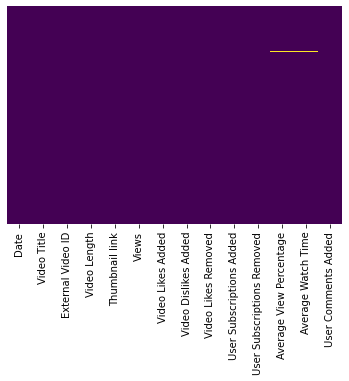

In [5]:
sns.heatmap(df_1.isnull(),yticklabels=False,
            cbar=False, cmap='viridis');

In [6]:
df_1.isnull().sum()

Date                             0
Video Title                      0
External Video ID                0
Video Length                     0
Thumbnail link                   0
Views                            0
Video Likes Added                0
Video Dislikes Added             0
Video Likes Removed              0
User Subscriptions Added         0
User Subscriptions Removed       0
Average View Percentage       1347
Average Watch Time            1347
User Comments Added              0
dtype: int64

In [7]:
df_1[df_1['Video Title']=='Predicting Crypto-Currency Price Using RNN lSTM & GRU'][:5]

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
167,19 Jan 2022,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,7,0,0,0,0,0,0.299775,93.230000,0
300,18 Jan 2022,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,6,0,0,0,0,0,0.174157,54.162833,0
428,17 Jan 2022,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,9,0,0,0,0,0,0.257334,80.031000,0
671,16 Jan 2022,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,3,0,0,0,0,0,0.090345,28.097333,0
888,15 Jan 2022,Predicting Crypto-Currency Price Using RNN lST...,qfRhKHV8-t4,311,https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg,6,0,0,0,0,0,0.174552,54.285667,0


## What types of video titles and thumbnails drive the most traffic?

In [4]:
titles=df_1['Video Title'].value_counts()
titles

Predicting Crypto-Currency Price Using RNN lSTM & GRU                 1522
How to Simulate NBA Games in Python                                   1105
How I Became A Data Scientist From a Business Background              1046
Should You Get A Masters in Data Science?                             1029
Work From Home Data Scientist: Day in the Life                        1015
                                                                      ... 
How I Would Learn Data Science in 2022 (If I Had to Start Over)         25
We Need to Talk About The LinkedIn Machine Learning Assessment.         18
The Only Data Science Explanation You Need                              11
Should  @Luke Barousse Take This Data Analyst Job? (Funny) #Shorts       6
Should You Be Excited About Web 3? (As a Data Scientist)                 4
Name: Video Title, Length: 223, dtype: int64

In [5]:
title_name=titles.index.str.replace("$$$$", " ",regex=False)

# No. of videos per titles (top 10)

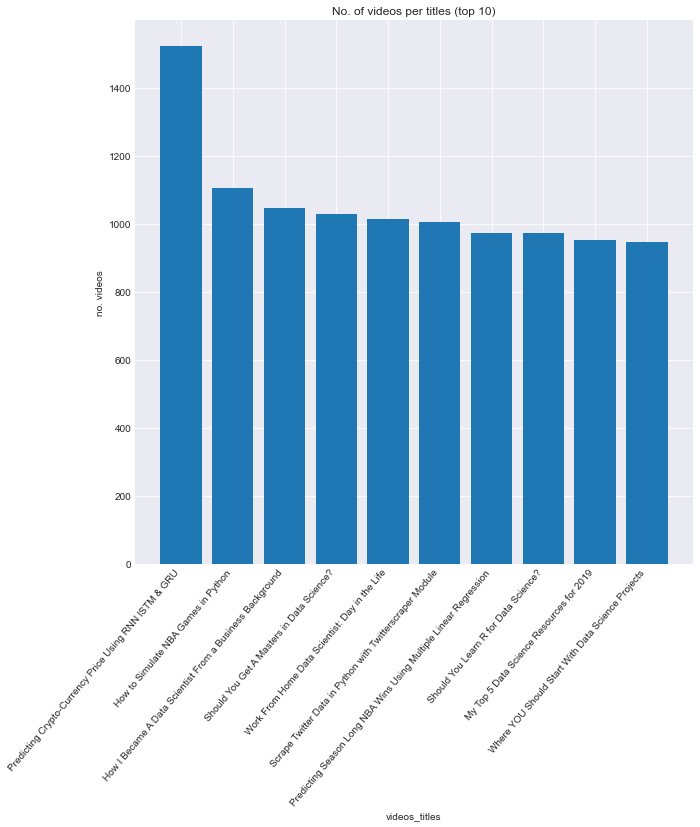

In [232]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(title_name[:10],
       titles.values[:10])
ax.set(xlabel='videos_titles',
       ylabel='no. videos',
       title='No. of videos per titles (top 10)')
plt.xticks(ha='right',rotation=50);

fig.savefig('No. of videos per titles (top 10).png')

# No. of videos per titles (bottom 5)

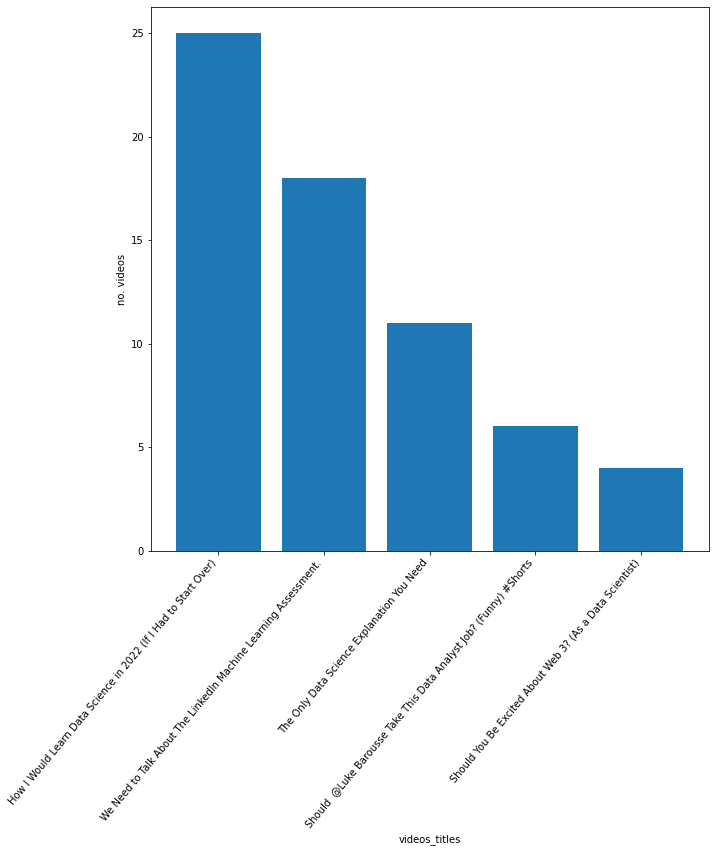

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(title_name[-5:],
       titles.values[-5:])
ax.set(xlabel='videos_titles',
       ylabel='no. videos')
plt.xticks(ha='right',rotation=50);

In [12]:
df_1['Thumbnail link'].value_counts()

https://i.ytimg.com/vi/qfRhKHV8-t4/hqdefault.jpg    1522
https://i.ytimg.com/vi/irjTWNV0eAY/hqdefault.jpg    1105
https://i.ytimg.com/vi/IFceyuL6GZY/hqdefault.jpg    1046
https://i.ytimg.com/vi/RRSRKf9eQxc/hqdefault.jpg    1029
https://i.ytimg.com/vi/4CpmB4TR2C4/hqdefault.jpg    1015
                                                    ... 
https://i.ytimg.com/vi/xpIFS6jZbe8/hqdefault.jpg      25
https://i.ytimg.com/vi/o-wsyxWbPOw/hqdefault.jpg      18
https://i.ytimg.com/vi/rEWPqw6rMGI/hqdefault.jpg      11
https://i.ytimg.com/vi/2RWwN5ZT4tA/hqdefault.jpg       6
https://i.ytimg.com/vi/0jTtHYie3CU/hqdefault.jpg       4
Name: Thumbnail link, Length: 223, dtype: int64

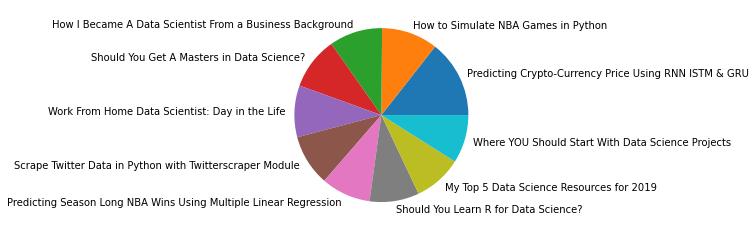

In [6]:
plt.pie(titles.values[:10],
        labels=titles.index[:10]);

In [14]:
# Maximum views on a video
df_1[df_1['Views']== df_1['Views'].max()]

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
95370,11 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,35677,1610,32,23,1844,21,0.3277,169.093076,0


## What types of video titles and thumbnails drive the most traffic?

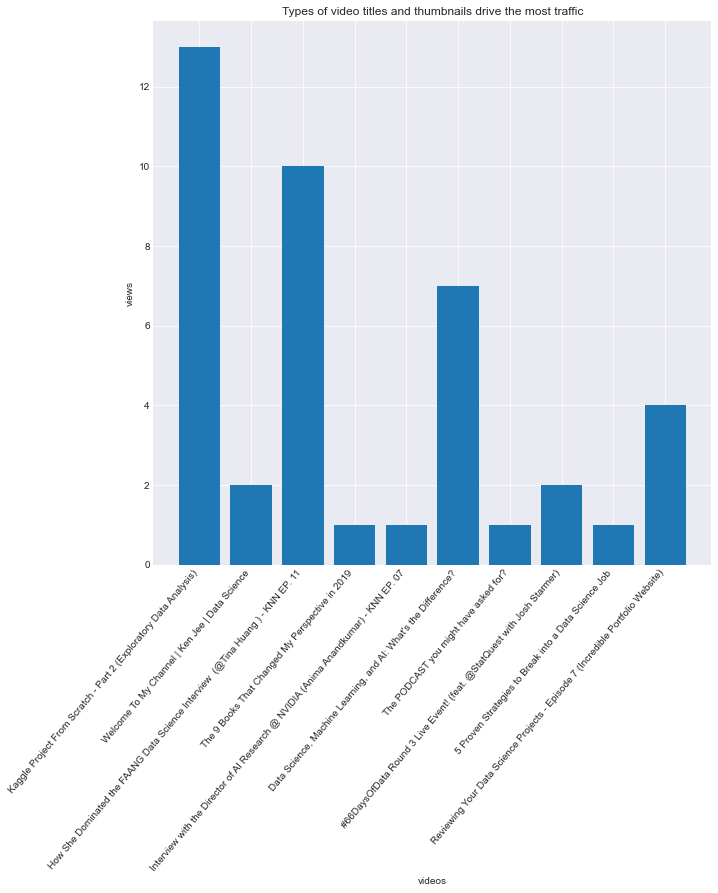

In [233]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(df_1['Video Title'][:10],
       df_1['Views'][:10])
ax.set(xlabel='videos',
       ylabel='views',
       title='Types of video titles and thumbnails drive the most traffic')
plt.xticks(ha='right', rotation=50);

fig.savefig('What types of video titles and thumbnails drive the most traffic.png')

## Top 10 viewed videos

In [7]:
top_viewed_videos=df_1.nlargest(10, ['Views'])
top_viewed_videos

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
95370,11 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,35677,1610,32,23,1844,21,0.327700,169.093076,0
95310,12 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,31473,1227,35,14,1590,10,0.318801,164.501076,0
92844,5 Jun 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,26668,527,289,53,630,9,0.146825,75.761913,0
92863,5 Jun 2020,How I Learned Data Science,n3vw0M5RrPU,806,https://i.ytimg.com/vi/n3vw0M5RrPU/hqdefault.jpg,20341,774,284,355,393,12,0.078592,63.345222,0
93945,25 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,16144,656,9,5,803,2,0.380045,196.103460,0
94036,24 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,15410,631,11,13,741,3,0.377352,194.713403,0
92878,5 Jun 2020,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,1054,https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg,15235,709,269,420,239,7,0.051380,54.154009,0
93881,26 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,14585,626,19,13,685,5,0.377691,194.888321,0
95509,10 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,14419,613,11,18,718,5,0.320161,165.203022,0
92808,5 Jun 2020,Different Data Science Roles Explained (by a D...,BZFfNwj7JhE,291,https://i.ytimg.com/vi/BZFfNwj7JhE/hqdefault.jpg,13875,188,289,38,264,4,0.126439,36.793610,0


In [10]:
#sort the column
top_viewed_videos.sort_values('Video Title', inplace=True)

# delect duplicates recored 
top_viewed_videos.drop_duplicates(subset='Video Title',
                                  keep='first',
                                  inplace=True)
top_viewed_videos

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
92808,5 Jun 2020,Different Data Science Roles Explained (by a D...,BZFfNwj7JhE,291,https://i.ytimg.com/vi/BZFfNwj7JhE/hqdefault.jpg,13875,188,289,38,264,4,0.126439,36.793610,0
92863,5 Jun 2020,How I Learned Data Science,n3vw0M5RrPU,806,https://i.ytimg.com/vi/n3vw0M5RrPU/hqdefault.jpg,20341,774,284,355,393,12,0.078592,63.345222,0
95370,11 May 2020,How I Would Learn Data Science (If I Had to St...,4OZip0cgOho,516,https://i.ytimg.com/vi/4OZip0cgOho/hqdefault.jpg,35677,1610,32,23,1844,21,0.327700,169.093076,0
92878,5 Jun 2020,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,1054,https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg,15235,709,269,420,239,7,0.051380,54.154009,0


In [29]:
from matplotlib import pyplot as plt

# Maximum no. of subs gain on a video.

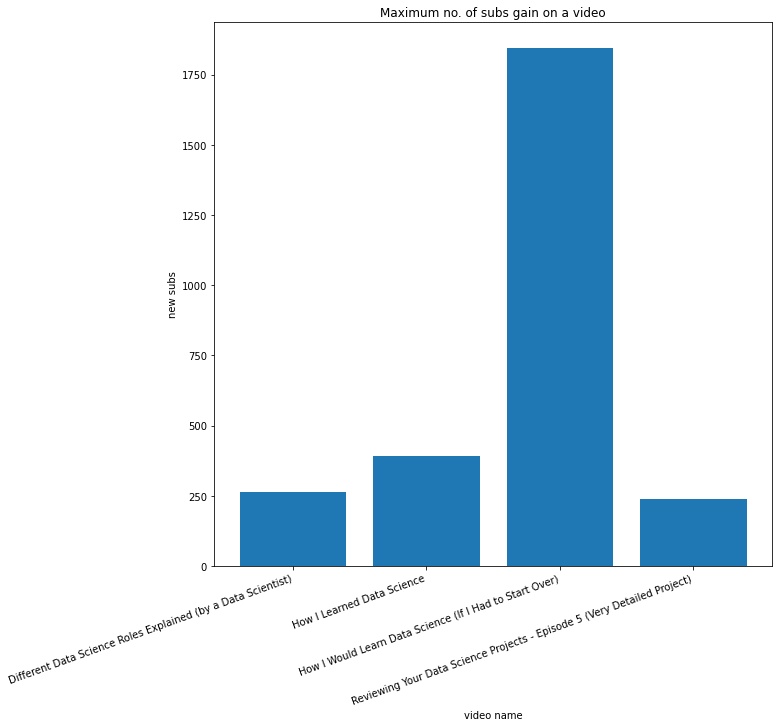

In [31]:
fig, ax =plt.subplots(figsize=(10,10))
ax.bar(top_viewed_videos['Video Title'],
        top_viewed_videos['User Subscriptions Added'])
ax.set(xlabel='video name',
       ylabel='new subs',
       title='Maximum no. of subs gain on a video')
plt.xticks(ha='right', rotation=20);

plt.savefig("Maximum no. of subs gain on a video.png",
            bbox_inches='tight',
            pad_inches=1)

In [24]:
least_performed_videos=df_1.nsmallest(10,['Views'])
least_performed_videos

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
215,18 Jan 2022,Reviewing Your Data Science Projects - Episode...,jam0xApfC-U,804,https://i.ytimg.com/vi/jam0xApfC-U/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
253,18 Jan 2022,Can You Learn Data Science Without a Computer?,Fs_LG5Y8GIU,199,https://i.ytimg.com/vi/Fs_LG5Y8GIU/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
259,18 Jan 2022,His Startup Will Land You a Data Science Job (...,7VcdvSyoxnc,3706,https://i.ytimg.com/vi/7VcdvSyoxnc/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
293,18 Jan 2022,Is it Important to Share Your Data Science Wor...,ELFGsNqZrlM,1181,https://i.ytimg.com/vi/ELFGsNqZrlM/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
296,18 Jan 2022,Building a Deep Learning BEAST (NVIDIA TITAN R...,_rbrdNTpZGo,578,https://i.ytimg.com/vi/_rbrdNTpZGo/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
317,18 Jan 2022,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,1054,https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
456,17 Jan 2022,5 Proven Strategies to Break into a Data Scien...,UpaEjBOMNqs,334,https://i.ytimg.com/vi/UpaEjBOMNqs/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
463,17 Jan 2022,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,1054,https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
494,17 Jan 2022,Reviewing Your Data Science Projects - Episode...,B1g_yMKpdwo,841,https://i.ytimg.com/vi/B1g_yMKpdwo/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
496,17 Jan 2022,Reviewing Your Data Science Projects - Episode...,6fwyyRgZlD0,668,https://i.ytimg.com/vi/6fwyyRgZlD0/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0


In [25]:
least_performed_videos.sort_values('Video Title', inplace=True)

# delete duplicate recoreds
least_performed_videos.drop_duplicates(subset='Video Title',
                                       keep='first',
                                       inplace=True)

least_performed_videos

,Date,Video Title,External Video ID,Video Length,Thumbnail link,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
456,17 Jan 2022,5 Proven Strategies to Break into a Data Scien...,UpaEjBOMNqs,334,https://i.ytimg.com/vi/UpaEjBOMNqs/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
296,18 Jan 2022,Building a Deep Learning BEAST (NVIDIA TITAN R...,_rbrdNTpZGo,578,https://i.ytimg.com/vi/_rbrdNTpZGo/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
253,18 Jan 2022,Can You Learn Data Science Without a Computer?,Fs_LG5Y8GIU,199,https://i.ytimg.com/vi/Fs_LG5Y8GIU/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
259,18 Jan 2022,His Startup Will Land You a Data Science Job (...,7VcdvSyoxnc,3706,https://i.ytimg.com/vi/7VcdvSyoxnc/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
293,18 Jan 2022,Is it Important to Share Your Data Science Wor...,ELFGsNqZrlM,1181,https://i.ytimg.com/vi/ELFGsNqZrlM/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
494,17 Jan 2022,Reviewing Your Data Science Projects - Episode...,B1g_yMKpdwo,841,https://i.ytimg.com/vi/B1g_yMKpdwo/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
215,18 Jan 2022,Reviewing Your Data Science Projects - Episode...,jam0xApfC-U,804,https://i.ytimg.com/vi/jam0xApfC-U/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
317,18 Jan 2022,Reviewing Your Data Science Projects - Episode...,HJH0gfY6EUg,1054,https://i.ytimg.com/vi/HJH0gfY6EUg/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0
496,17 Jan 2022,Reviewing Your Data Science Projects - Episode...,6fwyyRgZlD0,668,https://i.ytimg.com/vi/6fwyyRgZlD0/hqdefault.jpg,0,0,0,0,0,0,NaN,NaN,0


## Top videos like to dislike ratio

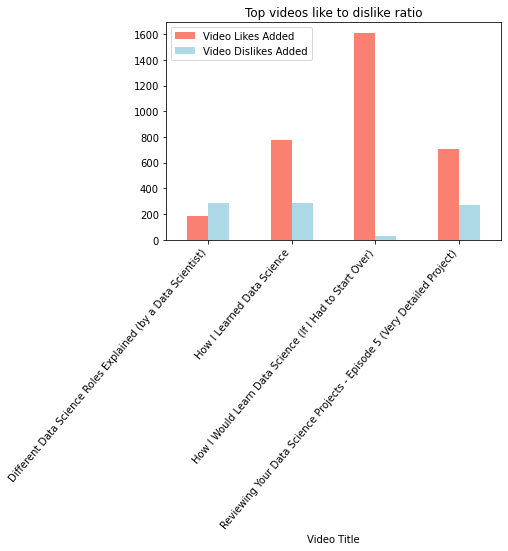

In [28]:
top_viewed_videos.plot(x='Video Title',
                       y=['Video Likes Added','Video Dislikes Added'],
                       kind='bar',
                       color=["salmon", "lightblue"],
                       title='Top videos like to dislike ratio')
plt.xticks(ha='right', rotation=50);

plt.savefig("Top videos like to dislike ratio.png.png",
           pad_inches = 1)
#fig.savefig("Top videos like to dislike ratio.png")

In [252]:
corr_matrix =df_1.corr()
corr_matrix

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
Video Length,1.000000,-0.018753,-0.027894,-0.005725,-0.008152,-0.026677,-0.003302,-0.446174,0.411822,NaN
Views,-0.018753,1.000000,0.931322,0.506406,0.409557,0.896315,0.570990,-0.008255,-0.009495,NaN
Video Likes Added,-0.027894,0.931322,1.000000,0.371828,0.391175,0.846474,0.614982,0.003849,-0.010757,NaN
Video Dislikes Added,-0.005725,0.506406,0.371828,1.000000,0.728963,0.319380,0.264379,-0.007010,-0.008260,NaN
Video Likes Removed,-0.008152,0.409557,0.391175,0.728963,1.000000,0.261404,0.225514,-0.005612,-0.008167,NaN
User Subscriptions Added,-0.026677,0.896315,0.846474,0.319380,0.261404,1.000000,0.391471,-0.000916,-0.011366,NaN
User Subscriptions Removed,-0.003302,0.570990,0.614982,0.264379,0.225514,0.391471,1.000000,-0.006427,-0.008923,NaN
Average View Percentage,-0.446174,-0.008255,0.003849,-0.007010,-0.005612,-0.000916,-0.006427,1.000000,0.336849,NaN
Average Watch Time,0.411822,-0.009495,-0.010757,-0.008260,-0.008167,-0.011366,-0.008923,0.336849,1.000000,NaN
User Comments Added,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


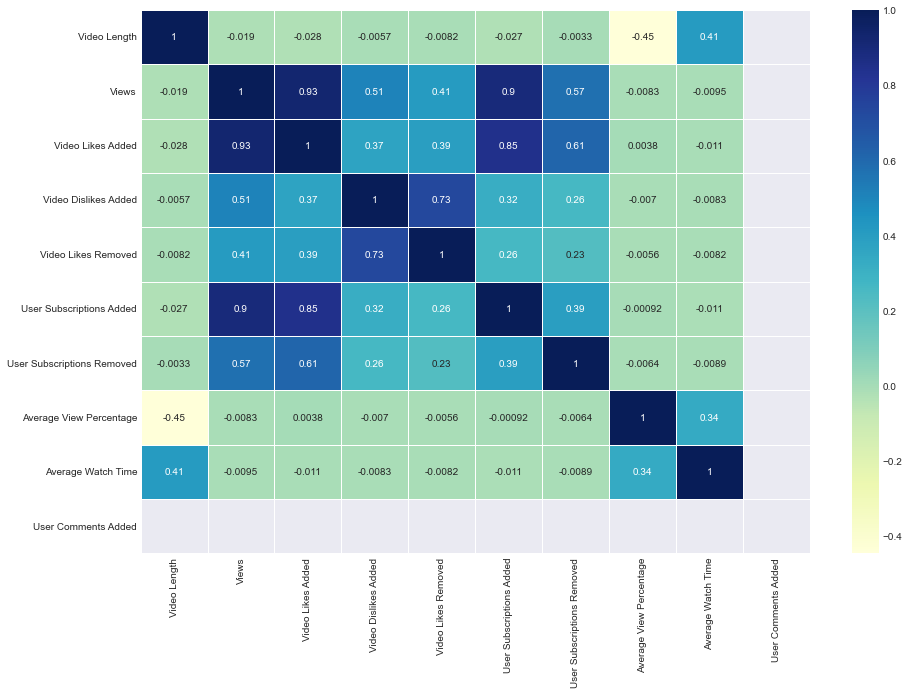

In [264]:
# plot corr_matrix
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu")
fig.savefig("correlation.png")

In [255]:
top_corr_matrix=top_viewed_videos.corr()
top_corr_matrix

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
Video Length,1.000000,-0.088053,0.146563,0.340841,0.905488,-0.296261,0.156079,-0.518345,-0.327571,NaN
Views,-0.088053,1.000000,0.826891,-0.086709,-0.165362,0.823555,0.847016,0.082593,0.095695,NaN
Video Likes Added,0.146563,0.826891,1.000000,-0.415577,-0.049659,0.884011,0.815084,0.303722,0.385169,NaN
Video Dislikes Added,0.340841,-0.086709,-0.415577,1.000000,0.645754,-0.616968,0.077642,-0.963796,-0.976363,NaN
Video Likes Removed,0.905488,-0.165362,-0.049659,0.645754,1.000000,-0.497547,0.156127,-0.788020,-0.647722,NaN
User Subscriptions Added,-0.296261,0.823555,0.884011,-0.616968,-0.497547,1.000000,0.628624,0.585994,0.586062,NaN
User Subscriptions Removed,0.156079,0.847016,0.815084,0.077642,0.156127,0.628624,1.000000,-0.141751,-0.094212,NaN
Average View Percentage,-0.518345,0.082593,0.303722,-0.963796,-0.788020,0.585994,-0.141751,1.000000,0.975998,NaN
Average Watch Time,-0.327571,0.095695,0.385169,-0.976363,-0.647722,0.586062,-0.094212,0.975998,1.000000,NaN
User Comments Added,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


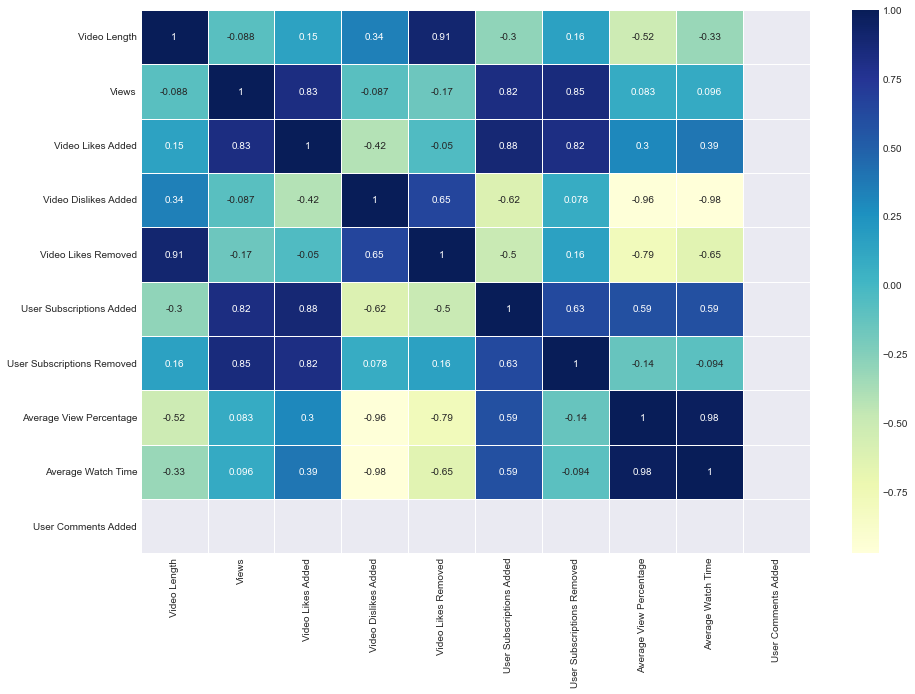

In [256]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(top_corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap="YlGnBu");

In [3]:
df.head()

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
2,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
3,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
4,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01


In [95]:
top_sub=df.nlargest(10,['Sub­scribers gained'])
top_sub

,Video,Video title,Video pub­lish time,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Av­er­age view dur­a­tion,Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
0,Total,NaN,NaN,14197,39640,3902,225021,45790,229241,5.276,11.990,26.61,0:03:25,5568487,317602.3536,183451,29068.652,100954064,3.16
1,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
7,Ip50cXvpWY4,The Best Free Data Science Courses Nobody is T...,"Mar 9, 2020",294,4694,75,19464,131,10734,4.097,9.124,33.80,0:02:06,297222,10465.0467,10603,1217.046,4512254,3.24
13,8igH8qZafpo,3 Proven Data Science Projects for Beginners (...,"Feb 17, 2020",220,1935,64,14708,72,9508,3.733,9.247,35.26,0:02:40,237467,10560.3597,9436,885.504,3137644,4.01
12,41Clrh6nv1s,How I Would Learn Data Science in 2021 (What H...,"Dec 19, 2020",232,741,63,5869,57,3358,7.526,15.786,41.01,0:03:45,123515,7724.2735,3301,929.400,1699309,3.93
41,MpF9HENQjDo,Data Science Project from Scratch - Part 1 (Pr...,"Apr 3, 2020",82,744,21,3197,22,3184,4.334,11.954,30.37,0:02:16,102854,3887.4233,3162,445.187,778177,5.35
29,yukdXV9LR48,The Projects You Should Do To Get A Data Scien...,"Jul 30, 2019",124,868,87,5218,53,2793,3.836,11.586,25.41,0:03:15,131630,7153.7437,2740,504.669,1748467,4.36
17,I3FBJdiExcg,Beginner Kaggle Data Science Project Walk-Thro...,"Jul 17, 2020",174,1265,59,4321,40,2585,5.330,13.695,15.89,0:06:04,168183,17039.6566,2545,894.753,2040561,4.71
32,xpIFS6jZbe8,How I Would Learn Data Science in 2022 (If I H...,"Dec 27, 2021",109,767,53,4413,46,2553,6.836,13.534,36.77,0:04:29,79283,5945.5420,2507,528.286,1420968,3.31
37,qV_AlRwhI3I,What is the #66DaysOfData?,"Dec 26, 2020",96,541,13,1827,33,2395,4.335,12.805,29.91,0:02:20,52921,2070.8803,2362,228.911,338516,3.44


In [125]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
plt.style.use('seaborn-darkgrid')

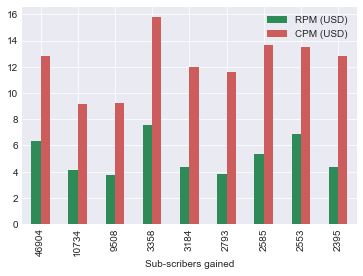

In [265]:
top_sub.plot(x='Sub­scribers gained',
        y=['RPM (USD)','CPM (USD)'],
        kind='bar',
        color=['SeaGreen','IndianRed']);

## RPM and CPM of most sub gain videos

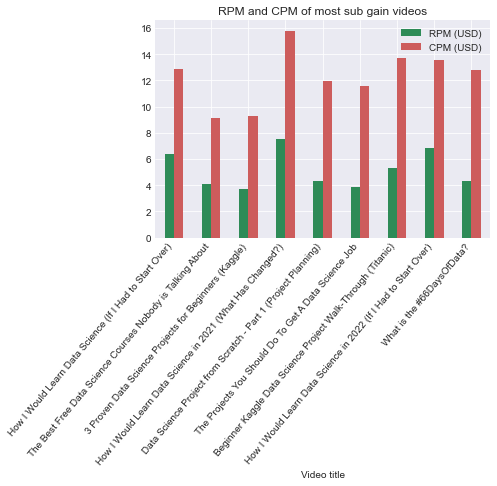

In [266]:
top_sub.plot(x='Video title',
        y=['RPM (USD)','CPM (USD)'],
        kind='bar',
        color=['SeaGreen','IndianRed'],
        title='RPM and CPM of most sub gain videos')
plt.xticks(ha='right', rotation=50)

fig.savefig('RPM and CPM of most sub gain videos.png');

## Estimated erning of top videos

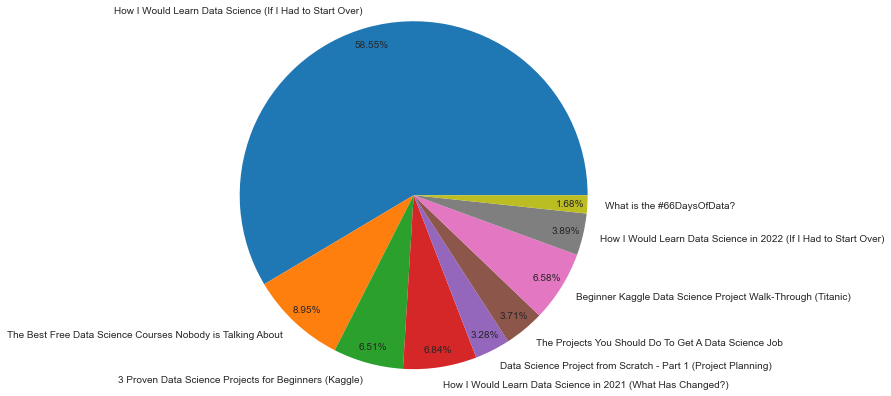

In [263]:
plt.pie(top_sub['Your es­tim­ated rev­en­ue (USD)'],
        labels=top_sub['Video title'],
        radius=2,
        autopct='%1.2f%%',
        pctdistance=0.9)

fig.savefig('Estimated erning of top videos.png');

In [85]:
top_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 37
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Video                                 10 non-null     object 
 1   Video title                           9 non-null      object 
 2   Video pub­lish time                   9 non-null      object 
 3   Com­ments ad­ded                      10 non-null     int64  
 4   Shares                                10 non-null     int64  
 5   Dis­likes                             10 non-null     int64  
 6   Likes                                 10 non-null     int64  
 7   Sub­scribers lost                     10 non-null     int64  
 8   Sub­scribers gained                   10 non-null     int64  
 9   RPM (USD)                             10 non-null     float64
 10  CPM (USD)                             10 non-null     float64
 11  Av­er­age per­cent­ag

In [127]:
time=top_sub['Av­er­age view dur­a­tion'].str.split(':').str[1]
top_sub['Av­er­age view dur­a­tion_mins']=time

In [128]:
top_sub['Av­er­age view dur­a­tion_sec']=top_sub['Av­er­age view dur­a­tion'].str.split(':').str[2]

In [129]:
top_sub['Av­er­age view dur­a­tion_mins']=top_sub['Av­er­age view dur­a­tion_mins'].astype(int)
top_sub['Av­er­age view dur­a­tion_sec']=top_sub['Av­er­age view dur­a­tion_sec'].astype(int)

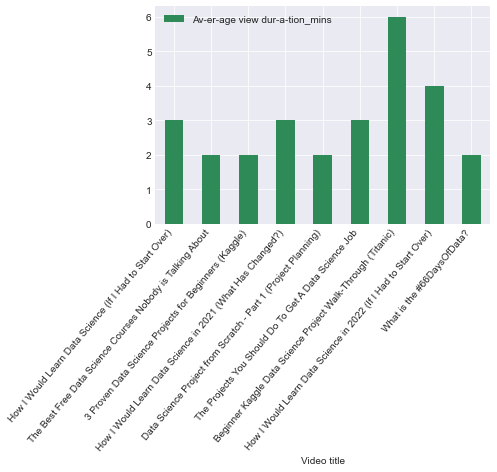

In [130]:
top_sub.plot(x='Video title',
        y='Av­er­age view dur­a­tion_mins',
        kind='bar',
        color='SeaGreen')
plt.xticks(ha='right', rotation=50);

## watch time of top 10 videos

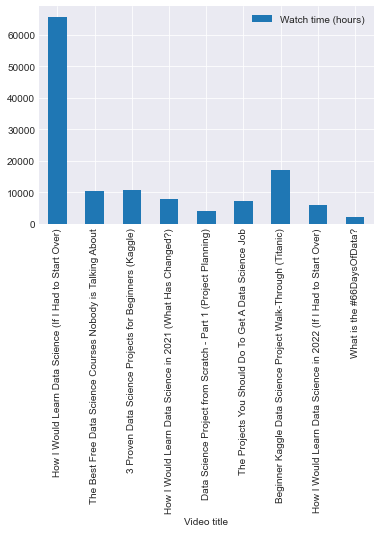

In [131]:
top_sub.plot(x='Video title',
             y='Watch time (hours)',
             kind='bar');

In [148]:
df_2=pd.read_csv('Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_2.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [151]:
df_2.columns

Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')

In [182]:
country=df_2['Country Code'].value_counts()

In [170]:
len(df_2['Country Code'].unique())

234

In [179]:
subs_country=df_2.groupby(['Video Title','Country Code', 'User Subscriptions Added']).size().reset_index().rename(columns={0:'subs_from_country'})

In [223]:
df_2['Country Code']

0        HK
1        ME
2        RW
3        US
4        DE
         ..
55287    MM
55288    SA
55289    DZ
55290    MX
55291    SR
Name: Country Code, Length: 55292, dtype: object

In [199]:
most_subs_from=country.nlargest(10)

In [205]:
least_subs_from=country.nsmallest(5)

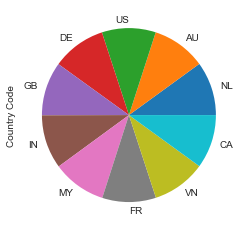

In [230]:
most_subs_from.plot(kind='pie');